# Pandas and first applications
**Camilo A. Garcia Trillos**

## Objective

Our objective in this part of the course is to develop a general framework to apply the theory we have studied in practice.

We discuss several important elements to take into account in most applications. 

This discussion is then illustrated by means of some simple applications using actual market data and Python routines


## Goal, Method, Model and Data

- The first question is always **what do we want to study/understand?** i.e. we start by fixing our *goal*.
- To answer this question, we choose a *methodology* (that is, a theoretical framework like the ones we presented in class).
- The methodology is usually accompany by a *model*, a representation of the system we want to study
- This *model* is fitted using relevant data

Our discussion today will be focused on the data


## Market Data

- Getting data 
  - Which data? Relation between data, goal and model
  - How? Build, buy and/or gather
    - Public: https://data.gov.uk/
    - Payed, Research oriented: CRSP, Compustat , Wharton Research
    - Financial data provider: Bloomberg, Reuters (refinitiv), Quandl, Ravenspack
    - Free (limited): yahoo.finance
  - Know your data: tickers, meaning of different variables




## What to do with data?

- Understand data: Explore and visualise the data.
- Clean data 
  - Changes in time
  - Gaps
  - Frequencies
  - Outliers
  - Correct merging or manipulation errors
- Make calculations
- Understand and test results.


## Using Data

Here, we are going to learn how to deal with some simple routines to work with data within Python, using the **pandas** package.


Students should have a look at things like **SQL**.


In [35]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
%matplotlib inline

## Dataframes


### Importing a database 

We are going to import four years of Dow Jones Data from STOOQ, using the pandas-datareader package. The following command reads a remote file and creates a dataframe in pandas.


---

<sup>1</sup> <small>Before, it was possible to use a Google and Yahoo finance API to download financial information. It seems it is not working at the time.</small>

In [36]:
import pandas_datareader.data as webd


DJI = webd.DataReader('^DJI', 'stooq', '2019-01-01',  '2022-12-31')


In [37]:
type(DJI)

pandas.core.frame.DataFrame



A dataframe is the main type of structure provided by Pandas: it implements the notion of database.

Let us look at some of the methods associated with a database

Describe: presents some general statistics on numerical data in the database.

In [38]:
DJI.describe() # This command shows some general statistics on the data

,Open,High,Low,Close,Volume
count,1008.000000,1008.000000,1008.000000,1008.000000,1.008000e+03
mean,30045.754732,30233.496052,29847.023681,30049.764891,3.802458e+08
std,3899.834389,3894.977042,3904.413739,3897.508805,1.360294e+08
min,19028.360000,19121.010000,18213.650000,18591.930000,8.615198e+07
25%,26665.187500,26804.547500,26535.842500,26658.430000,2.955294e+08
50%,30039.640000,30225.645000,29852.725000,30027.115000,3.545953e+08
75%,33856.845000,34043.867500,33624.270000,33880.565000,4.404089e+08
max,36722.600000,36952.650000,36636.000000,36799.650000,2.191756e+09


The methods *head* and *tail* show respectively the first (5, if no argument given) and last entries of the database. 

In [39]:
DJI.head() # Show the first elements

,Open,High,Low,Close,Volume
Date,,,,,
2022-12-30,33121.61,33152.55,32847.82,33147.25,296466276.0
2022-12-29,33021.43,33293.42,33020.35,33220.80,246092457.0
2022-12-28,33264.76,33379.55,32869.15,32875.71,254988084.0
2022-12-27,33224.23,33387.72,33069.58,33241.56,247056048.0
2022-12-23,32961.06,33226.14,32814.02,33203.93,221932148.0


In [40]:
DJI.tail() # Show the last elements

,Open,High,Low,Close,Volume
Date,,,,,
2019-01-08,23680.32,23864.65,23581.45,23787.45,317413830.0
2019-01-07,23474.26,23687.74,23301.59,23531.35,334185364.0
2019-01-04,22894.92,23518.64,22894.92,23433.16,395923318.0
2019-01-03,23176.39,23176.39,22638.41,22686.22,424276458.0
2019-01-02,23058.61,23413.47,22928.59,23346.24,321542416.0




These commands give us an idea of what is on the database: it is composed by many rows (1008) with 6 different named fields. There is a special column, 'date' acting as an index, and we will come back to it later. 

Note that we have a mix of different types of entries. Indeed, let us look at the types of each one of the columns.

In [41]:
DJI.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

The above command show us a list of all fields in the dataframe and the types of each one of them. Most of them are float numbers (float64) and an 'object' type (more on this in a moment). 



Let us discuss the meaning of each one of these entries:

- date:   the date at which the information is collected.

The following data are unadjusted, i.e., are presented as they occurred on the given date.

- open:   the price of the stock at the start of the trading day.
- high:   the maximum price the stock achieved during the trading day.
- close : the price of the stock at the end of the trading day.
- volume: the amount in dollars exchanged on this stock during the trading day





## Series

Dataframes are composed by series, which are, in turn a collection of individual (or scalar) entries.

We can extract and operate on series by passing the name of the entry to the database.



In [42]:
high = DJI['High']
low = DJI['Low']

print(high)
print('type of adjmax', type(high))

Date
2022-12-30    33152.55
2022-12-29    33293.42
2022-12-28    33379.55
2022-12-27    33387.72
2022-12-23    33226.14
                ...   
2019-01-08    23864.65
2019-01-07    23687.74
2019-01-04    23518.64
2019-01-03    23176.39
2019-01-02    23413.47
Name: High, Length: 1008, dtype: float64
type of adjmax <class 'pandas.core.series.Series'>


Above we extracted the series of adjusted low and high. Note the corresponding indices are retrieved as well. 



Several operations can then be performed on these series. For example, we can create a new series containing the rage of values for each date:

In [43]:
range_ = high-low # we use a final udnerscore to distinguish this series from the function range
print(range_)



Date
2022-12-30    304.73
2022-12-29    273.07
2022-12-28    510.40
2022-12-27    318.14
2022-12-23    412.12
               ...  
2019-01-08    283.20
2019-01-07    386.15
2019-01-04    623.72
2019-01-03    537.98
2019-01-02    484.88
Length: 1008, dtype: float64


We can add the newly created ranges to our database as a new column, as follows:

In [44]:
DJI['range']=range_
DJI.head()

,Open,High,Low,Close,Volume,range
Date,,,,,,
2022-12-30,33121.61,33152.55,32847.82,33147.25,296466276.0,304.73
2022-12-29,33021.43,33293.42,33020.35,33220.80,246092457.0,273.07
2022-12-28,33264.76,33379.55,32869.15,32875.71,254988084.0,510.40
2022-12-27,33224.23,33387.72,33069.58,33241.56,247056048.0,318.14
2022-12-23,32961.06,33226.14,32814.02,33203.93,221932148.0,412.12


This is useful for producing calculated columns.



### Checking for data integrity and fixing Indices

We can particular entries in a dataframe or series by either using the position of the row or using the identifying index of the row. Indeed, the role of the index is to allow us to retrieve a given particular row in a menaingful way. It typically is chosen as a unique identifier, although sometimes one can use repeated indices to accelerate some computations.

Here are some examples:

In [45]:
# Accessing a given row by position using the method .iloc

print('The row of the dataframe at position by the number 3: \n\n', DJI.iloc[3])
print('\n\n ----- \n\n The row of the range series indexed by the number 3: \n\n', range_.iloc[3])

The row of the dataframe at position by the number 3: 

 Open      3.322423e+04
High      3.338772e+04
Low       3.306958e+04
Close     3.324156e+04
Volume    2.470560e+08
range     3.181400e+02
Name: 2022-12-27 00:00:00, dtype: float64


 ----- 

 The row of the range series indexed by the number 3: 

 318.1399999999994


In [46]:
# Accessing a given row by index  using the method .loc

print('The row of the dataframe at position by the number 3: \n\n', DJI.loc['2022-12-27'])
print('\n\n ----- \n\n The row of the range series indexed by the number 3: \n\n', range_.loc['2022-12-27'])

The row of the dataframe at position by the number 3: 

 Open      3.322423e+04
High      3.338772e+04
Low       3.306958e+04
Close     3.324156e+04
Volume    2.470560e+08
range     3.181400e+02
Name: 2022-12-27 00:00:00, dtype: float64


 ----- 

 The row of the range series indexed by the number 3: 

 318.1399999999994


You can also select only a subset of the columns in DJI

In [50]:
DJI.loc['2022-12-27', ['High']]

High    33387.72
Name: 2022-12-27 00:00:00, dtype: float64

All indices are stored in the .index property of a DataFrame or series types.

In [47]:
DJI.index

DatetimeIndex(['2022-12-30', '2022-12-29', '2022-12-28', '2022-12-27',
               '2022-12-23', '2022-12-22', '2022-12-21', '2022-12-20',
               '2022-12-19', '2022-12-16',
               ...
               '2019-01-15', '2019-01-14', '2019-01-11', '2019-01-10',
               '2019-01-09', '2019-01-08', '2019-01-07', '2019-01-04',
               '2019-01-03', '2019-01-02'],
              dtype='datetime64[ns]', name='Date', length=1008, freq=None)

Note that the indices are 'datetime64' type. this means they are effectively treated as dates. This is convenient as there are many supported modules that act on dates. For instance, it is possible to select entries by giving a time interval or passing strings denoting the desired date. Here are some examples:

In [54]:
DJI.loc['2022-12']

,Open,High,Low,Close,Volume,range
Date,,,,,,
2022-12-30,33121.61,33152.55,32847.82,33147.25,296466276.0,304.73
2022-12-29,33021.43,33293.42,33020.35,33220.80,246092457.0,273.07
2022-12-28,33264.76,33379.55,32869.15,32875.71,254988084.0,510.40
2022-12-27,33224.23,33387.72,33069.58,33241.56,247056048.0,318.14
2022-12-23,32961.06,33226.14,32814.02,33203.93,221932148.0,412.12
2022-12-22,33233.35,33233.35,32573.43,33027.49,342509235.0,659.92
2022-12-21,33028.09,33437.84,33028.09,33376.48,328388241.0,409.75
2022-12-20,32735.24,32992.23,32649.45,32849.74,309631994.0,342.78
2022-12-19,32921.45,33038.94,32581.97,32757.54,330825543.0,456.97


In [55]:
DJI.loc['2022-12-01':'2023-01-01']

,Open,High,Low,Close,Volume,range
Date,,,,,,
2022-12-30,33121.61,33152.55,32847.82,33147.25,296466276.0,304.73
2022-12-29,33021.43,33293.42,33020.35,33220.80,246092457.0,273.07
2022-12-28,33264.76,33379.55,32869.15,32875.71,254988084.0,510.40
2022-12-27,33224.23,33387.72,33069.58,33241.56,247056048.0,318.14
2022-12-23,32961.06,33226.14,32814.02,33203.93,221932148.0,412.12
2022-12-22,33233.35,33233.35,32573.43,33027.49,342509235.0,659.92
2022-12-21,33028.09,33437.84,33028.09,33376.48,328388241.0,409.75
2022-12-20,32735.24,32992.23,32649.45,32849.74,309631994.0,342.78
2022-12-19,32921.45,33038.94,32581.97,32757.54,330825543.0,456.97


Let us now check that there are no missing data. We do not expect any issues but we should always check for this.

In [48]:
DJI.isnull().any() # This looks for missing values in any field of the database (TRUE if misisng FALSE if not). Then checks if tehre is at least one  TRUE.

Open      False
High      False
Low       False
Close     False
Volume    False
range     False
dtype: bool

As shown above, none of the fields has missing values. Let us now check whether the dates in the database are unique.


In [56]:
DJI.index.is_unique

True

As we can see, each date appears ony one in the index.

### Sampling a dataframe

One of the advantages of having a date index is that we can resample the data. Indeed, let's say that we are interested in weekly returns, but we only have daily returns as above. 

We can pick then resample the data using the power of pandas. Let us suppose we take now the data at of each Friday as a representative of the week. We would simply write

In [57]:
DJI_week = DJI.resample('W-FRI').last() # Sample the database on a weekly basis finishing on a Friday, and taking the last data of each interval

In [58]:
DJI_week.head()

,Open,High,Low,Close,Volume,range
Date,,,,,,
2019-01-04,22894.92,23518.64,22894.92,23433.16,395923318.0,623.72
2019-01-11,23940.01,23996.32,23798.16,23995.95,262719487.0,198.16
2019-01-18,24534.19,24750.22,24459.03,24706.35,372887671.0,291.19
2019-01-25,24687.21,24860.15,24676.75,24737.20,376813788.0,183.40
2019-02-01,25025.31,25193.15,24982.49,25063.89,372183351.0,210.66


This takes the data in bits of one week, ending on a Friday, and taking the last value as a representative (i.e. the value on a Friday). To verify this, let us compare with the value on the original dataframe of the first Friday

In [61]:
DJI.loc['2019-01-04']

Open      2.289492e+04
High      2.351864e+04
Low       2.289492e+04
Close     2.343316e+04
Volume    3.959233e+08
range     6.237200e+02
Name: 2019-01-04 00:00:00, dtype: float64

Of course, some of the data is no longer an accurate summary. We would like to have the opening, high, low  and volume of the week (and not the opening of the Friday). We can call different versions of the resample function to adjust for this. Look at the following code

In [64]:
DJI_week['Open'] =  DJI['Open'].resample('W-FRI').first()
DJI_week['Close'] =  DJI['Close'].resample('W-FRI').last()
DJI_week['High'] =  DJI['High'].resample('W-FRI').max()
DJI_week['Low'] =  DJI['Low'].resample('W-FRI').min()
DJI_week['Volume'] =  DJI['Volume'].resample('W-FRI').sum()


In [65]:
DJI_week.head()

,Open,High,Low,Close,Volume,range
Date,,,,,,
2019-01-04,23058.61,23518.64,22638.41,23433.16,1.141742e+09,623.72
2019-01-11,23474.26,24014.78,23301.59,23995.95,1.576862e+09,198.16
2019-01-18,23880.53,24750.22,23765.24,24706.35,1.533449e+09,291.19
2019-01-25,24607.76,24860.15,24244.31,24737.20,1.353886e+09,183.40
2019-02-01,24596.98,25193.15,24323.94,25063.89,1.954762e+09,210.66


It is trongly recommended to read the help on the resample function on pandas, as it has many different applications and particularities.

**Warning:** Resampling data should be used carefully. The above example is mainly illustrative, and we need to be careful when working with non-adjusted resampled data.

## Visualising data

### Plotting a price series

Let's next plot the daily closing prices, and then the weekly returns.

Text(0, 0.5, 'Close price DJI (USD)')

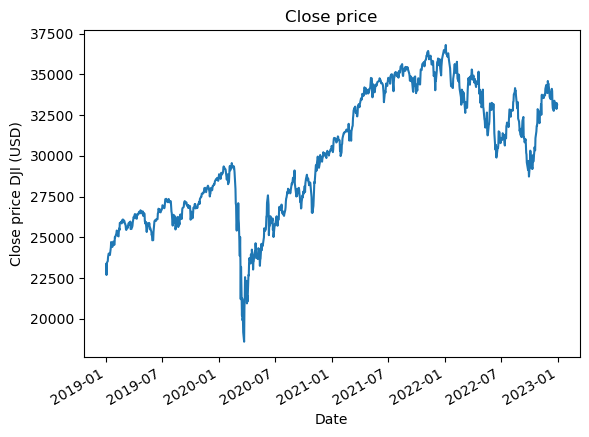

In [66]:
DJI['Close'].plot(title='Close price')
plt.ylabel('Close price DJI (USD)')

We see an important drop in the closing value of the DJI around March 2020...  the month when the COVID-19 outbreak was declared a pandemic by World Health Organization

### A histogram of log-returns

Let's compute the weekly (gross) log returns. We can plot a series as a function of time as before. However, this time we might instead look at the histogram of past log-returns. We have

$$  \log\left( R_{t+1} \right) = \log\left( \frac{S_{t+1}}{S_t}\right) = \log( S_{t+1})  - \log({S_t})    $$


A frequent assumption is that the sequence of log-returns is stationary. Note that this is exactly the type of assumption behind the geometric-Brownian motion model under which

$$ S_{t+1} = S_t \exp( \sigma  Z_{t+1}) $$

with $Z_{t+1} \sim \mathcal N(0,1) $ and $\sigma$ a constant number.

In the following, we calculate the log-returns and check if the process seems to be stationary. If so, we look at its associated histogram. 




We compute first the log prices and then find the differences.


In [73]:
logp = np.log(DJI['Close']) # Note that we can apply directly numpy functions to series or dataframe
logr = logp.diff()  # This calculates the differences between entries
logr.head()

Date
2022-12-30         NaN
2022-12-29    0.002216
2022-12-28   -0.010442
2022-12-27    0.011067
2022-12-23   -0.001133
Name: Close, dtype: float64

It worked well... except for the first entry (clearly we cannot calculate the return 0). We just drop this line as follows

In [74]:
logr.drop(logr.index[0], inplace=True)   # Find what is the first index and drop the row that has it. Note this is another instance where inplace is needed
logr.head()

Date
2022-12-29    0.002216
2022-12-28   -0.010442
2022-12-27    0.011067
2022-12-23   -0.001133
2022-12-22   -0.005328
Name: Close, dtype: float64

Let us look at a time plot of the log returns

Text(0, 0.5, 'One-week log-returns')

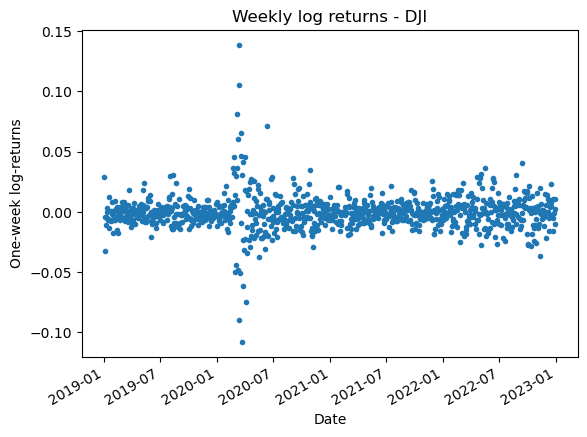

In [75]:
logr.plot(style='.')
plt.title('Weekly log returns - DJI')
plt.ylabel('One-week log-returns')

The plot does not seem to show any trend in mean: points seems to oscillate around a stable value. There seems to be an important but temporary change in volatility around March 2020. The year 2022 also seems slightly more volatile.



We can use again the sampling functions with different summarising measures to check for the potential stability of means.

<Axes: title={'center': 'Moving standard deviation of log-returns. Window: 3 months. '}, xlabel='Date'>

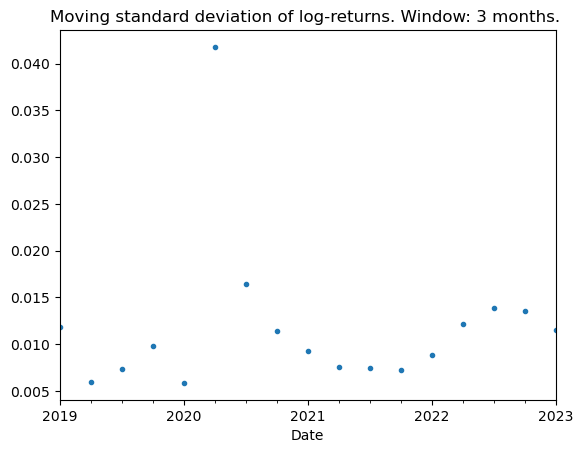

In [76]:
sd_diff = logr.resample('3M').std()
sd_diff.plot(title='Moving standard deviation of log-returns. Window: 3 months. ', style='.')

# Note that we do several commands here: first we resample by 3 months, then we sumarise with standard deviation and  then we plot

There is indeed some oscillation in the averaged 3 month data (note we are averaging about 60 trading days). An interesting almost sinusoidal pattern appears here.


A statistical test could be performed to check if there is a first order dependence between two successive values.


**Augmented Dickey-Fuller test:** This statistical test is based on the fitting an autoregressive model to the data as follows:

$$ \Delta y_{t+1} = \alpha + \beta t + \gamma y_{t} + \sum_{i=0}^p \delta_p  \Delta y_{t-p} +\epsilon_t $$
where $\Delta y_s =  y_s-y_{s-1}$

If the process is stationary (up to at some trend), we expect a tendency to return to the mean: we then expect $\gamma<0$ in this case. The ADF test has as null hypothesis that $\gamma =0$ and checks against $\gamma\leq 0$.

In [77]:
from statsmodels.tsa.stattools import adfuller

In [78]:
adfuller(logr)[1] # We reject the presence of a unit root if this value is very small (say less than 0.01)

7.123654616504477e-16

Since we reject the null assumption, we get $\gamma\leq 0$. All in all, we do not have enough evidence to reject stationarity.

## Can we fit a known distribution?


With the stationarity assumption, we can now focus on understanding if the data fits a know distribution. Let us look at the histogram of log-returns.

Text(0.5, 1.0, 'Histogram of weekly log-returns')

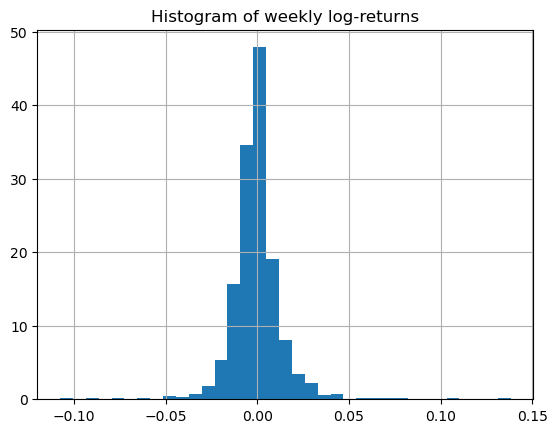

In [79]:
logr.hist(density=True, bins=35)
plt.title('Histogram of weekly log-returns')

It does not look very 'Gaussian'. For good measure, we use also a [qqplot](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot). It can be found on the stats submodule of Scipy

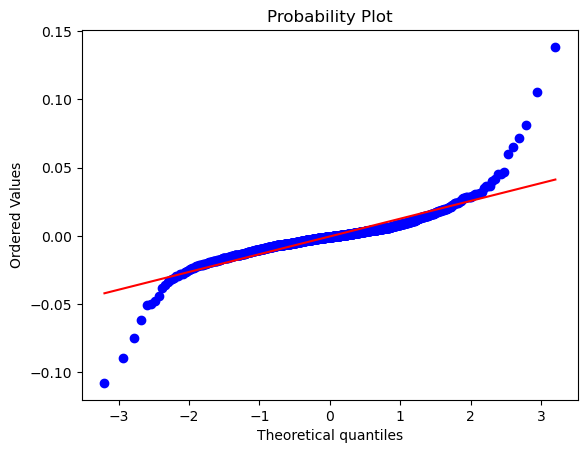

In [80]:
from scipy.stats import probplot
probplot(logr, plot=plt); # The semicolon (;) avoids any output. plt=plot asks this function to plot the result using the matplotlib rendering engine

The *probplot* function is a qqplot of the empirical weekly data against the best fit for a Gaussian distribution (using maximum likelihood). The result shows that the daily returns do not look close to a Gaussian. What about the weekly returns?


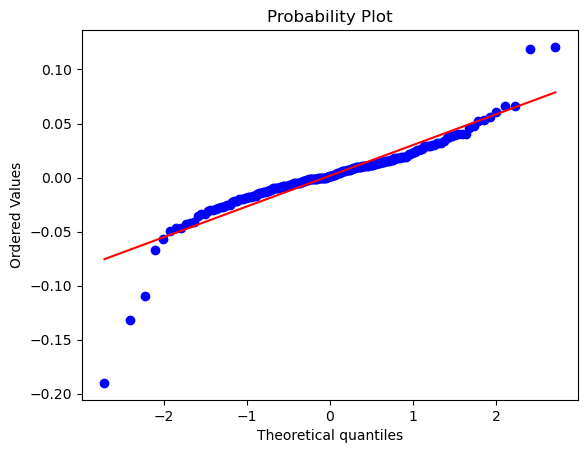

In [82]:
logrw = np.log(DJI_week['Close']).diff() 
logrw.drop(logrw.index[0], inplace=True) 
probplot(logrw, plot=plt);


Here, the plot is much closer to a Gaussian, although the Gaussian distribution largely sub-estimates negative returns (i.e. losses) and very high values that are larger than 2 standard deviations. 

Indeed, as in the course, the quantiles of the approximation can be found by taking $E[X] + {\rm sd(X)}\Phi^{-1}(X)$. We get

In [84]:
mean_logrw = logrw.mean()
sd_logrw = logrw.std()
from scipy.stats import norm

print('The lowest 1% quantile of returns: ', logrw.quantile(0.01), '. The lowest 1% quantile using a Gaussian fit ', mean_logrw + sd_logrw*norm.ppf(0.01))


The lowest 1% quantile of returns:  -0.10637933890172278 . The lowest 1% quantile using a Gaussian fit  -0.06963240556373583


Clearly we subestimate possible losses. This is inconvenient for VaR computations.

## Exercises

1. Using the Dow Jones database in this notebook, calculate a time series with the mean and standard deviation of daily returns within a month.

2 Assume that an investor buys 1000 USD worth of an ETF replicating DJI on the 3 January 2019.

a) What would be the total value of the investment (including dividends) on December 1 2021?

b) Find the $90%$ VaR of the daily net log-returns from the empirical distribution.